In [100]:
# Importacao das bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [101]:
# Lendo o arquivo

df = pd.read_csv('/content/dataframe.csv')
df.sample(5)

,data_medicao,nome_condominio,quantidade_placas,potencia_placa_kW,consumo_kWh,quantidade_habitantes,quantidade_torres,quantidade_apartamentos,quantidade_ar_condicionado,energia_solar_gerada_kWh,energia_recomendada_kWh,mes,estacao
129081,2031-01-25,Condominio_32,32,0.30,2411.6840,162,2,36,72,42.56,7308.13,1,Verão
98287,2029-05-19,Condominio_38,34,0.30,4572.3100,369,2,32,64,36.91,15241.03,5,Outono
29051,2025-08-04,Condominio_2,58,0.30,5684.8575,477,10,170,340,56.96,18047.15,8,Inverno
135582,2031-06-04,Condominio_33,20,0.35,4106.7390,378,2,28,56,25.78,13037.25,6,Inverno
129548,2031-02-03,Condominio_49,47,0.35,4942.2120,342,4,40,80,79.24,14976.39,2,Verão


In [102]:
# Vendo informações sobre o dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   data_medicao                150000 non-null  object 
 1   nome_condominio             150000 non-null  object 
 2   quantidade_placas           150000 non-null  int64  
 3   potencia_placa_kW           150000 non-null  float64
 4   consumo_kWh                 150000 non-null  float64
 5   quantidade_habitantes       150000 non-null  int64  
 6   quantidade_torres           150000 non-null  int64  
 7   quantidade_apartamentos     150000 non-null  int64  
 8   quantidade_ar_condicionado  150000 non-null  int64  
 9   energia_solar_gerada_kWh    150000 non-null  float64
 10  energia_recomendada_kWh     150000 non-null  float64
 11  mes                         150000 non-null  int64  
 12  estacao                     150000 non-null  object 
dtypes: float64(4),

## Detalhes do dataset

Podemos verificar que o dataset é bem completo e não possui colunas nulas, isso vai ajudar a treinar nosso modelo.

### Informações sobre as colunas

 - data_medicao  
   A data que foi tirado aquela medição.

 - nome_condominio  
   O nome do condomínio.

 - quantidade_placas  
   A quantidade de placas que o condomínio tinha no dia que foi tirado aquela medição.

 - potencia_placa_kW  
   A potência daquela placa no dia daquela medição.

 - consumo_kWh:  
   O consumo de energia do condomínio naquele dia.

 - quantidade_habitantes:  
   A quantidade de habitantes que tinha no condomínio naquele dia.

 - energia_solar_gerada_kWh:  
   A energia que estava sendo gerada naquele dia.

 - energia_recomendada_kWh:  
   A quantidade de energia recomendada



In [103]:
df.head()

,data_medicao,nome_condominio,quantidade_placas,potencia_placa_kW,consumo_kWh,quantidade_habitantes,quantidade_torres,quantidade_apartamentos,quantidade_ar_condicionado,energia_solar_gerada_kWh,energia_recomendada_kWh,mes,estacao
0,2024-01-01,Condominio_1,58,0.35,1452.913,118,2,40,40,100.52,4402.78,1,Verão
1,2024-01-01,Condominio_2,59,0.30,7861.337,477,8,96,192,83.71,23822.23,1,Verão
2,2024-01-01,Condominio_3,24,0.30,5356.692,484,5,55,110,28.85,16232.38,1,Verão
3,2024-01-01,Condominio_4,43,0.30,4514.532,380,2,24,24,63.96,13680.40,1,Verão
4,2024-01-01,Condominio_5,31,0.30,6773.008,453,6,120,240,42.71,20524.27,1,Verão


In [104]:
# Primeiro vamos transformar a coluna em uma data que o python consiga entender
df['data_medicao'] = pd.to_datetime(df['data_medicao'])

# Extraindo o mês para classificar a estação do ano
df['mes'] = df['data_medicao'].apply(lambda x: x.month)
# Contando os meses
df['mes'].value_counts()


,count
mes,
1,13950
3,13300
2,12750
5,12400
7,12400
8,12400
10,12400
12,12400
4,12000


In [105]:
# Aplicando a função para marcar a estação do ano
def get_estacao(mes):
    if mes in [12, 1, 2]:
        return 'Verão'
    elif mes in [3, 4, 5]:
        return 'Outono'
    elif mes in [6, 7, 8]:
        return 'Inverno'
    else:
        return 'Primavera'

df['estacao'] = df['mes'].apply(get_estacao)
df['estacao'].value_counts()


,count
estacao,
Verão,39100
Outono,37700
Inverno,36800
Primavera,36400


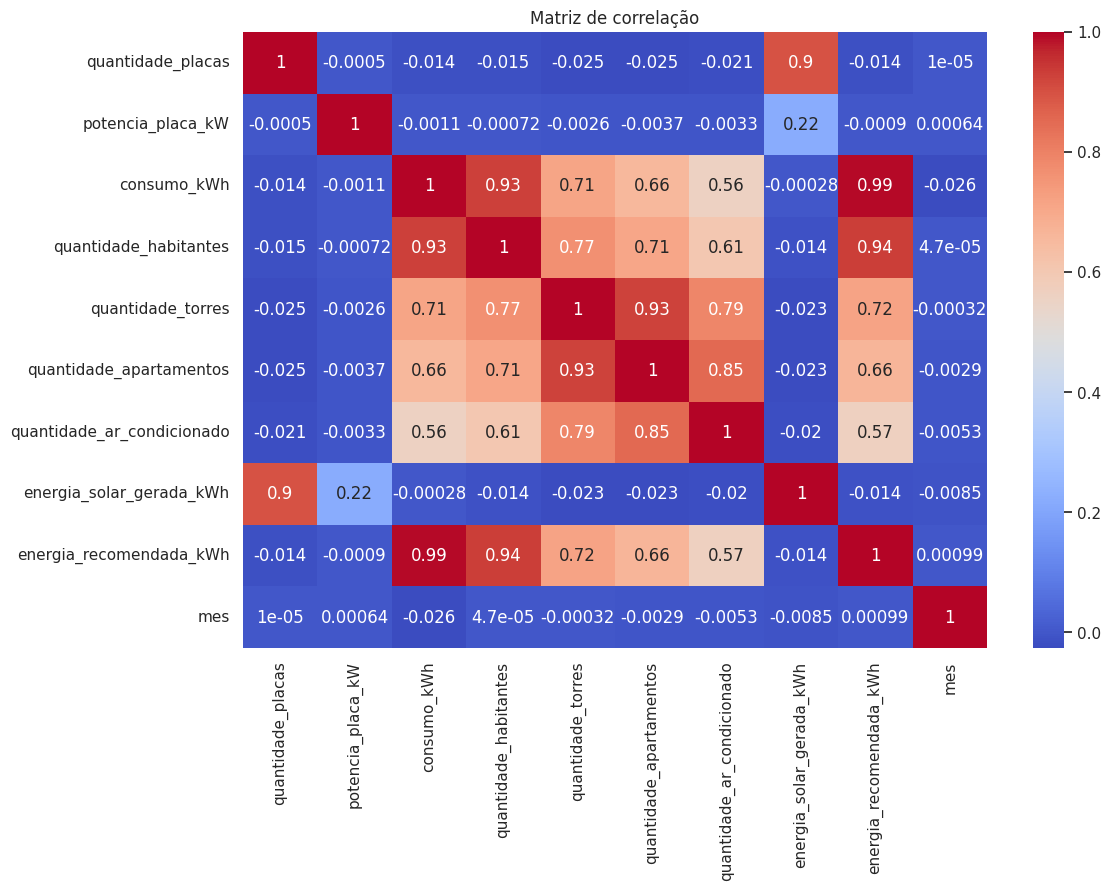

In [106]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlação')
plt.show()

## Analise do gráfico
Quantidade de habitantes e consumo tem uma correlação positiva muito forte com a coluna alvo (energia_recomendada_kWh), assim como as colunas quantidade de torre e quantidade de apartamentos, temos uma correlação forte com a nossa couluna alvo.
Nossa coluna quantidade de ar condicionado tem uma correlação moderada, nesse momento faria sentido não usarmos ela no treinamento pois a sua relação com as outras colunas que iremos usar pode impactar o aprendizado do modelo.

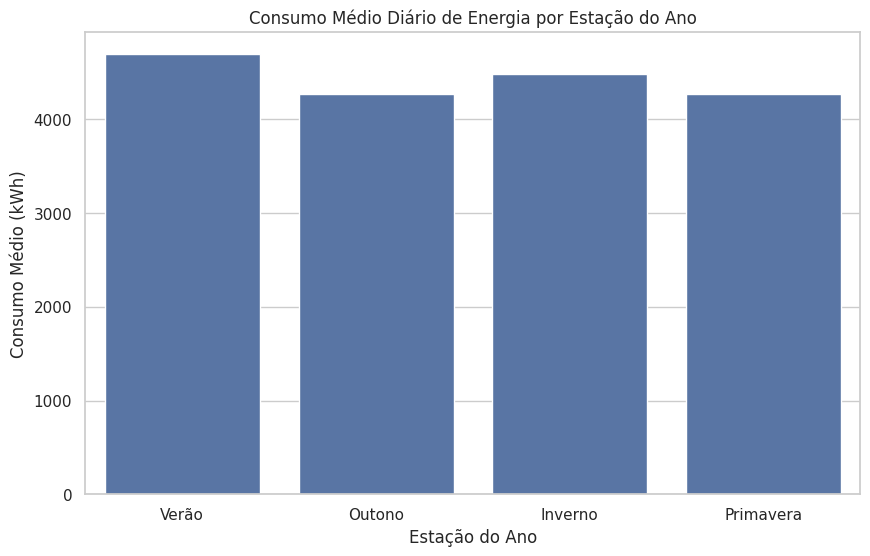

In [107]:
# Vendo o consumo por estação
consumo_por_estacao = df.groupby("estacao")["consumo_kWh"].mean().reindex(["Verão", "Outono", "Inverno", "Primavera"])

plt.figure(figsize=(10, 6))
sns.barplot(x=consumo_por_estacao.index, y=consumo_por_estacao.values)
plt.title("Consumo Médio Diário de Energia por Estação do Ano")
plt.xlabel("Estação do Ano")
plt.ylabel("Consumo Médio (kWh)")
plt.show()